# Downloading Images using the Flickr API

For many image processing problems, one needs a set of test images.  The [ImageNet site](http://www.image-net.org/) has an enormous set of images of 1000 different classes with bounding boxes.  But, this set is large, and may not have the exact image classes you are looking for.  An alternative way to get images is via the [Flickr API](https://stuvel.eu/flickrapi-doc/), which gives you access to millions of images in the Flickr database.

In this demo, you will learn to:
* Load images from the Flickr API
* Resize images to a desired shape
* Save images to a file

## Installing and Loading the Flickr API package

The [Flickr API](https://stuvel.eu/flickrapi-doc/) provides a simple python interface.  You will need to install it via

    pip install flickrapi
   
You can validate the installation by import the package.

In [1]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
%matplotlib inline

To use the Flickr API, you need to apply for keys.  You can do this on the [Flickr website](https://www.flickr.com/services/api/misc.api_keys.html).  Once you have the keys, they can be set as follows.

In [2]:
api_key = u'fd60e4760344928b7e5c09634e0aac85'  # Enter key here
api_secret = u'e288f312eb2e4b62'               # Enter secret here
flickr = flickrapi.FlickrAPI(api_key, api_secret)

## Loading the Images
The `flickr.walk()` function provides a generator of URLs for photos with a particular `keyword`.  To illustrate the method, we will get a number of elephant images.

Create a directory with the name of the keyword for the images.

In [3]:
import os

def create_dir(dir_name):
    dir_exists = os.path.isdir(dir_name)
    if not dir_exists:
        os.mkdir(dir_name)
        print("Making directory %s" % dir_name)
    else:
        print("Will store images in directory %s" % dir_name)

for dir_name in ['car', 'bicycle']:
    create_dir("train")
    create_dir("train/"+dir_name)

    create_dir("test")
    create_dir("test/"+dir_name)

Making directory train
Making directory train/car
Making directory test
Making directory test/car
Will store images in directory train
Making directory train/bicycle
Will store images in directory test
Making directory test/bicycle


Next, we create a routine for displaying images.

In [4]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

Often we need images to be all of the same size.  The following routine resizes images, padding the image if necessary.

In [5]:
def resize_im(im0,nrow,ncol):
    """
    Resizes and pads an image to match a target output shape.
    
    im0:  The input image
    nrow, ncol:  The desired output shape.
    
    It is assumed that nrow==ncol.
    """
    # Get current image shape
    nrow0 = im0.shape[0]
    ncol0 = im0.shape[1]
    nchan = im0.shape[2]
    # Crop rows or columns if not square
    if (ncol0 > nrow0):
        pad = (ncol0-nrow0)//2
        im = np.zeros((ncol0,ncol0,nchan),dtype=np.uint8)
        im[pad:pad+nrow0,:,:] = im0
    elif (nrow0 >= ncol0):
        pad = (nrow0-ncol0)//2
        im = np.zeros((nrow0,nrow0,nchan),dtype=np.uint8)        
        im[:,pad:pad+ncol0,:] = im0
        
    # Resize the image
    im = skimage.transform.resize(im,(nrow,ncol),mode='constant')
    
    return im

Now, we walk through the images and save the files.  We will save the files in the paths:

    ./train
        /car
           car_0000.jpg
           car_0001.jpg
           ...
           car_0999.jpg
        /bicycle
           bicycle_0000.jpg
           bicycle_0001.jpg
           ...
           bicycle_0999.jpg
    ./test
        /car
           car_0000.jpg
           car_0001.jpg
           ...
           car_0299.jpg
        /bicycle
           bicycle_0000.jpg
           bicycle_0001.jpg
           ...
           bicycle_0299.jpg
    

In [6]:
import warnings
    

ntrain = 1000
ntest  = 300

nimage = ntrain+ntest


full_size_fn = 'full_size'
nrow = 224
ncol = 224

for dir_name in ['car', 'bicycle']:
    keyword=dir_name
    
    photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)
    
    i = 0
    base = 'train/'
    for photo in photos:
        if i >= ntrain:
            base = 'test/'

        url=photo.get('url_c')
        if not (url is None):
            # Save image to temporary full size
            urllib.request.urlretrieve(url, full_size_fn)

            # Read image from file
            im = skimage.io.imread(full_size_fn)

            # Resize the image
            if len(im.shape) < 3:
                continue
            
            im1 = resize_im(im,nrow,ncol)

            # Convert to uint8, suppress the warning about the precision loss
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                im2 = skimage.img_as_ubyte(im1)

            # Save the image
            k = i if i < ntrain else i-ntrain
            
            local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(base+dir_name,keyword, k)  
            skimage.io.imsave(local_name, im2)      
            print(local_name)
            i = i + 1        
        if (i >= nimage):        
            break        

train/car/car_0000.jpg
train/car/car_0001.jpg
train/car/car_0002.jpg
train/car/car_0003.jpg
train/car/car_0004.jpg
train/car/car_0005.jpg
train/car/car_0006.jpg
train/car/car_0007.jpg
train/car/car_0008.jpg
train/car/car_0009.jpg
train/car/car_0010.jpg
train/car/car_0011.jpg
train/car/car_0012.jpg
train/car/car_0013.jpg
train/car/car_0014.jpg
train/car/car_0015.jpg
train/car/car_0016.jpg
train/car/car_0017.jpg
train/car/car_0018.jpg
train/car/car_0019.jpg
train/car/car_0020.jpg
train/car/car_0021.jpg
train/car/car_0022.jpg
train/car/car_0023.jpg
train/car/car_0024.jpg
train/car/car_0025.jpg
train/car/car_0026.jpg
train/car/car_0027.jpg
train/car/car_0028.jpg
train/car/car_0029.jpg
train/car/car_0030.jpg
train/car/car_0031.jpg
train/car/car_0032.jpg
train/car/car_0033.jpg
train/car/car_0034.jpg
train/car/car_0035.jpg
train/car/car_0036.jpg
train/car/car_0037.jpg
train/car/car_0038.jpg
train/car/car_0039.jpg
train/car/car_0040.jpg
train/car/car_0041.jpg
train/car/car_0042.jpg
train/car/c

We display some of the images.  Note the black border since we have padded the images to keep the square aspect ratio.

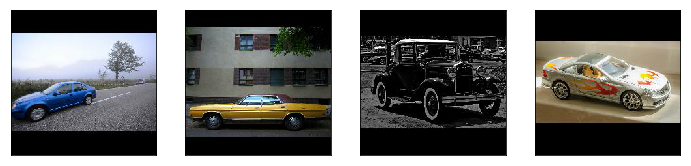

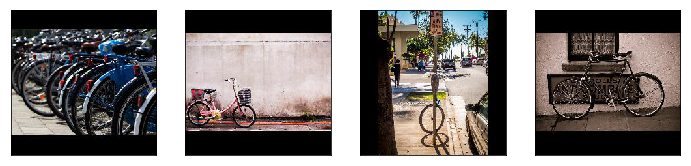

In [7]:
plt.figure(figsize=(20,20))
nplot = 4
# for base in ['train/', 'test/']:

base = 'train/'

for dir_name in ['car', 'bicycle']:
    keyword=dir_name
    plt.figure(figsize=(12,6))
    for i in range(nplot):
        fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(base+dir_name,keyword, i)  
        im = skimage.io.imread(fn)
        plt.subplot(1,nplot,i+1)
        disp_image(im)